# New Lesson 3: Morphological Operations and Quantifications

You now know how to find objects of interest in an image and produce masks which correspond to these objects. Up until now, we've relied on good image preprocessing to produce quality masks. Now we will talk about morphological operations, which instead focus on making improvements to the masks directly.

1. In this module you will first learn
   What is a morphological operation
   How to choose the right parameters for your morphological operation
   Some common morphological operations
    - Erosion
    - Dilation
    - Opening
    - Closing


2. To quantify the change in nuclear localization and amount of your favorite protein with drug treatment. We would like to be able to answer two questions: 

    1) Does the *total* amount of protein per cell change with drug treatment and 
    2) How does the localization change between the nucleus and the cytoplasm? 
    
    Addressing these questions requires care when choosing the preprocessing algorithms to apply and their ordering, as well as batch processing across datasets.

3. Access properties of cells that have been detected, such as
    - Area
    - Intensity
    - Image vs mask properties
    - Measures of roundness
    - Aspect ratio
    - Convexity
    
   View the statistics of properties of detected cells;
   Filter out unwanted cells based on their properties

### 3.1 Load previously processed data (filter and thresholding)

Load functions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.ndimage
from scipy.stats import iqr
from ipywidgets import interact
sns.set_style('dark', rc={'image.cmap':'inferno'})

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


Load images

In [2]:
# MAKE SURE YOU ADD YOUR DIRECTORY BELOW
from skimage.io import imread
data_folder='../Data/Data_ConfocalDrugPanel/'
data_drug = imread(data_folder+"drugA.tif")
data_nodrug = imread(data_folder+"DMSO.tif")

Load meta data

In [3]:
import json
with open(data_folder+'DMSO_metadata.json', mode='r') as f_nodrug:
    meta_nodrug = json.load(f_nodrug)

for key, value in meta_nodrug.items():
    print(key)

drug_slice = {}
nodrug_slice = {}
for idx, channel in enumerate(meta_nodrug['channels']):
    drug_slice[channel] = data_drug[3,:,:,idx]
    nodrug_slice[channel] = data_nodrug[3,:,:,idx] #add in the indexing when read in full dataset
    print(channel)

axes
pixel_size
cell_type
channels
raw_data_date
image_preprocessing_done
your_fav_protein
nucleus
actin


Show images

Text(0.5, 0.98, 'After Drug')

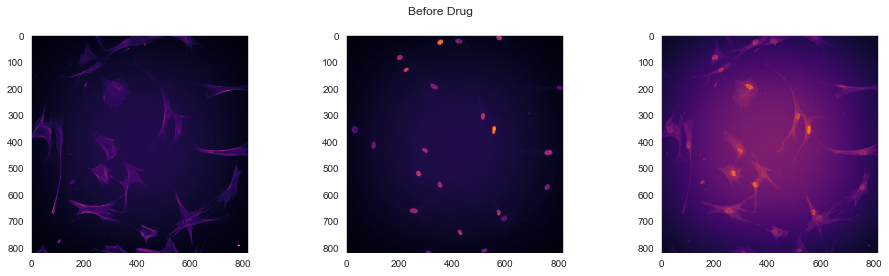

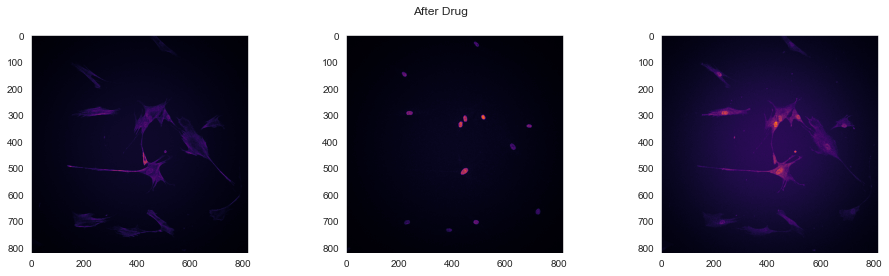

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].imshow(nodrug_slice["actin"])
ax[1].imshow(nodrug_slice['nucleus'])
ax[2].imshow(nodrug_slice["your_fav_protein"])
fig.suptitle('Before Drug')

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].imshow(drug_slice["actin"])
ax[1].imshow(drug_slice['nucleus'])
ax[2].imshow(drug_slice["your_fav_protein"])
fig.suptitle('After Drug')

Masking


In [5]:
#answer


### Morphological Operations

In [23]:
from skimage.restoration import rolling_ball
from skimage.filters.rank import median as median_filter
from skimage.filters.rank import minimum as min_filter
from skimage.filters import threshold_otsu # Our Otsu

import skimage.morphology as sm
from scipy.ndimage import binary_dilation,binary_erosion,binary_opening,binary_closing

3.2.2. Pre-process and threshold and practice making functions



C:\ProgramData\Anaconda3\lib\site-packages\skimage\filters\rank\generic.py:266: UserWarning: Bad rank filter performance is expected due to a large number of bins (65524), equivalent to an approximate bitdepth of 16.0.
  out_dtype)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\filters\rank\generic.py:266: UserWarning: Bad rank filter performance is expected due to a large number of bins (65375), equivalent to an approximate bitdepth of 16.0.
  out_dtype)


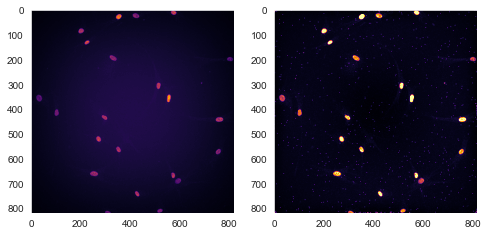

In [24]:
# Let's work only with one channel 
def preprocess_image(image,structuring_radius):
    # Apply the min filt
    filt_image=median_filter(image,disk(1))
    structuring_radius = 50
    structuring_element = disk(structuring_radius)
    background = min_filter(filt_image, structuring_element)
    #substract from image and make sure negative pixels are set to 0
    processed_image=image-background
    #set processed image values smaller than 0 to 0.
    #processed_image....
    return processed_image
fig,ax=#Make a 1 by 2 figure layout
image=nodrug_slice['nucleus']
processed_image=#..?

#plot image and processed image on both axes


Binary operations on binary images (thresholded images). Why ? If we want to use these images as 'masks' to define where a cell is, and where the background is, reality is not always our friend : mask-regions may be very 'peppery'

In [26]:
thresholded_image = processed_image<threshold_otsu(processed_image)
thresholded_image.astype(int)
snippet=thresholded_image[600:750,550:700]

#build your interactive image exploring app
#make a 1 by 3 axis, and plot the snippet (mask) on axis 0, the eroded version on 1, and the dilated version axis 2
#you want to make an interactive function that displays what happens when you change the number of iterations of
#the binary operation

In [27]:
#do the same for binary closing and dilating

Labeling objects

Text(0.5, 1.0, 'Regions labeled')

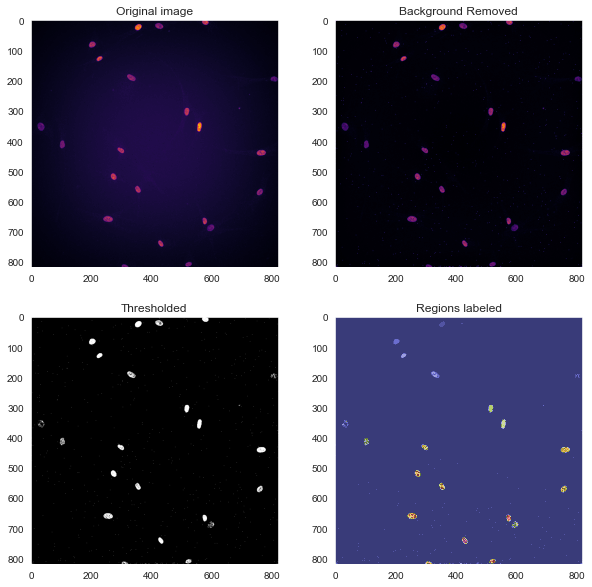

In [28]:
from skimage.measure import label,regionprops
fig,ax=plt.subplots(2,2,figsize=(10,10))

image=nodrug_slice['nucleus']
processed_image=preprocess_image(image,70)

ax[0,0].imshow(image)
ax[0,1].imshow(processed_image)
thresholded_image = processed_image>threshold_otsu(processed_image)
ax[1,0].imshow(thresholded_image,cmap='Greys_r')
labeled_image=label(thresholded_image)
ax[1,1].imshow(labeled_image,cmap='tab20b')

ax[0,0].set_title('Original image')
ax[0,1].set_title('Background Removed')
ax[1,0].set_title('Thresholded')
ax[1,1].set_title('Regions labeled')

In [29]:
num_object=np.max(labeled_image)
num_object #Too many objects are being counted !

721

3.2.4. Optimized Operation Results (Closing-opening)

25

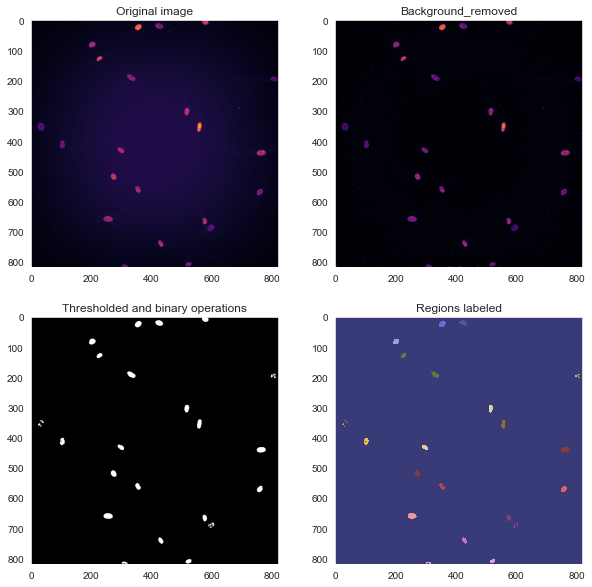

In [30]:
from skimage.morphology import remove_small_holes,remove_small_objects
fig,ax=plt.subplots(2,2,figsize=(10,10))

ax[0,0].imshow(image)
ax[0,1].imshow(processed_image)
thresholded_image = processed_image>threshold_otsu(processed_image)
thresholded_image_operated = remove_small_objects(remove_small_holes(binary_closing(thresholded_image)),min_size=10)
ax[1,0].imshow(thresholded_image_operated,cmap='Greys_r')
labeled_image=label(thresholded_image_operated)
ax[1,1].imshow(labeled_image,cmap='tab20b',interpolation='None')
# for axis in [ax[1,0],ax[1,1]]:
#     axis.set_xlim(200,350)
#     axis.set_ylim(100,230)
ax[0,0].set_title('Original image')
ax[0,1].set_title('Background_removed')
ax[1,0].set_title('Thresholded and binary operations')
ax[1,1].set_title('Regions labeled')
np.max(labeled_image)

Show the detected regions by grabbing their x.y coordinates and scatter-plotting them

In [32]:
#do a scatter plot of the detected regions, by grabbing their 'xy' coordinates.
#there's many regions, which are stored in a list, so a loop is probably a good idea
#also, these regions are objects which have properties (and functions) accessible by the 'dot (.)'
#i.e, region.coordinates, region.area, etc.. How to check all the available stuff that comes with regions?


### 3.3 Quantifications

Find cell body by getting rid of nuclei from the dialated actin mask 

In [37]:

#No drug
cell_body = nodrug_slice['actin']
processed_body=preprocess_image(cell_body,70)
thresholded_body=processed_body>threshold_otsu(processed_body)
adjusted_thresholded_body=remove_small_holes(binary_closing(thresholded_body,iterations=2),area_threshold=500)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\filters\rank\generic.py:266: UserWarning: Bad rank filter performance is expected due to a large number of bins (62602), equivalent to an approximate bitdepth of 15.9.
  out_dtype)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\filters\rank\generic.py:266: UserWarning: Bad rank filter performance is expected due to a large number of bins (61468), equivalent to an approximate bitdepth of 15.9.
  out_dtype)


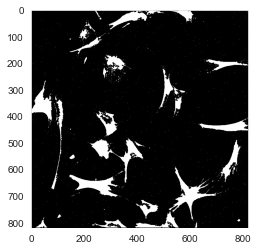

In [38]:
from skimage.morphology import remove_small_holes
plt.imshow(adjusted_thresholded_body,cmap='Greys_r')


In [39]:
#No drug
cell_nucleus = nodrug_slice['nucleus']
processed_nucleus=preprocess_image(cell_nucleus,70)
thresholded_nucleus=processed_nucleus>threshold_otsu(processed_nucleus)
adjusted_thresholded_nucleus=remove_small_holes(binary_closing(thresholded_nucleus,iterations=2),area_threshold=500)

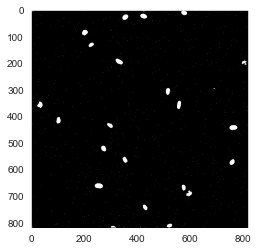

In [40]:
from skimage.morphology import remove_small_holes
plt.imshow(adjusted_thresholded_nucleus,cmap='Greys_r')


In [43]:
total_brightness_body_nodrug=#?
total_brightness_nucleus_nodrug=#?
area_body=[r.area for r in regionprops(label(only_body_thresholded))]
area_nucleus=[r.area for r in regionprops(label(adjusted_thresholded_nucleus))]
np.sum(area_body), np.sum(area_nucleus), total_brightness_body_nodrug/np.sum(area_body), total_brightness_nucleus_nodrug/np.sum(area_nucleus)

(50876, 6840, 0.14345959559026678, 1.5993368044868508)

In [42]:
#pack into function !
#No drug
def get_body_vs_nucleus_prot_expression(cell_body,nucleus):
    '''This function takes as input the cell body and nucleus images of a given drug condition
    use as my_drug_condition['body'], my_drug_condition['nucleus'] or however you call these keywords
    from a conveniently excellent json metadata file you have with your data'''
    def make_binaryops_threshold(image):
        processed=preprocess_image(image,70)
        thresholded=processed>threshold_otsu(processed)
        adjusted_thresholded=remove_small_holes(binary_closing(thresholded,iterations=2),area_threshold=500)
        return adjusted_thresholded
    body_mask = make_binaryops_threshold(cell_body)
    nucleus_mask = make_binaryops_threshold(nucleus)
    body_mask_without_nucleus = body_mask-nucleus_mask
    body_mask_without_nucleus[body_mask_without_nucleus<0]=0
# can you continue this function ? We want to grab the favorite protein intensity given by these masks, and normalize them
# by the area of the mask, to have a per-area protein expression for both cells and nuclei.


#evaluate this function now on drug/no_drug !

In [22]:
## What happens when nuclei are too close together ? Intro to watershedding

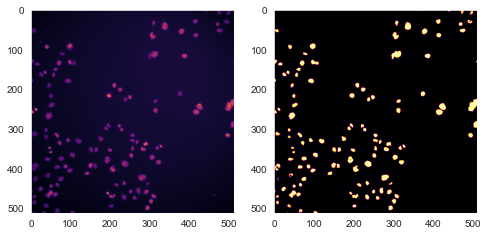

In [28]:
crowded_image = imread('../Data/Tracking/HAC-Cit-KRAB+dox_w3RFPled_s41_t271.TIF')
fig,ax=plt.subplots(1,2,figsize=(8,4))

ax[0].imshow(crowded_image)
ax[1].imshow(crowded_image>threshold_otsu(crowded_image))

Text(0.5, 1.0, 'Overlapping cells detected as single cells !')

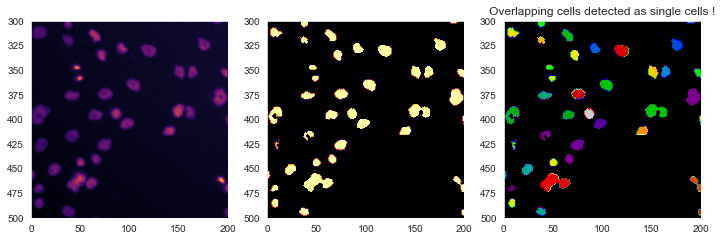

In [29]:
fig,ax=plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(crowded_image)
thresholded=remove_small_holes(binary_closing(crowded_image>threshold_otsu(crowded_image)))
ax[1].imshow(thresholded)
labeled=label(thresholded)
reorder=np.arange(int(np.max(labeled))+1)
np.random.shuffle(reorder)
reorder[0]=0
labeled=reorder[labeled]
ax[2].imshow(labeled,cmap='nipy_spectral')
for a in ax:
    a.set_xlim(0,200)
    a.set_ylim(500,300)
ax[2].set_title('Overlapping cells detected as single cells !')

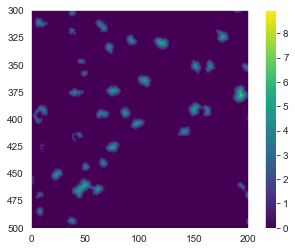

In [30]:
from scipy.ndimage import distance_transform_edt
distance_transformed=distance_transform_edt(thresholded)
plt.imshow(distance_transformed,cmap='viridis')
plt.xlim(0,200)
plt.ylim(500,300)
plt.colorbar()

In [31]:
regions=regionprops(label(thresholded))
regions=[r for r in regions if r.area>10]
radii = [r.equivalent_diameter/2 for r in regions]
median_radius = np.median(radii)

In [32]:
from skimage.feature import peak_local_max


(500.0, 300.0)

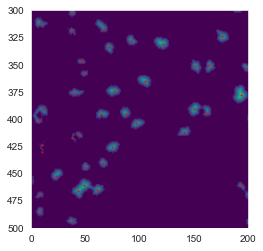

In [37]:
y_max,x_max=peak_local_max(distance_transformed,min_distance=int(0.8*median_radius)).T
plt.imshow(distance_transformed,cmap='viridis')
plt.scatter(x_max,y_max,color='r',s=1)
plt.xlim(0,200)
plt.ylim(500,300)

(500.0, 300.0)

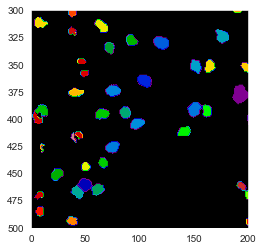

In [38]:
from skimage.segmentation import watershed
markers=np.zeros(distance_transformed.shape)
markers[y_max,x_max]=np.arange(1,len(y_max)+1)
watershedded_label=watershed(-distance_transformed,mask=thresholded,markers=markers,watershed_line=True)
plt.imshow(watershedded_label,cmap='nipy_spectral')
plt.xlim(0,200)
plt.ylim(500,300)